# Association Rules Exercise: Auto Sales

The exercises in this notebook are similar to what you have seen in the lab. The **`arlues`** package that is being used for mining association rules needs data to be of type factor. Therefore it takes lots of pre-processing, converting the data to the right type for association rule mining. 

This notebook uses auto sales data for the resale of cars. This could be a regression problem. The two fields of data **`dateCreated`** and **`lastSeen`** could be indicators of when a car came into the store and when it left the store (or was sold). If we take the difference in days then we can try to predict the number of days it took for the car to be resold. 

    Let's try to find if there are patterns of features that occur frequently. Read the data from `/dsa/data/all_datasets/autos.csv`

**Activity 1:** Read the auto_sales data into a variable called auto_sales

In [1]:
# Your code for activity 1 goes here.
# ------------------------------------
auto_sales = read.csv('/dsa/data/all_datasets/autos.csv')

In [2]:
head(auto_sales,3)

dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
2016-03-24 11:52:17,Golf_3_1.6,privat,Angebot,480,test,,1993,manuell,0,golf,150000,0,benzin,volkswagen,,2016-03-24 00:00:00,0,70435,2016-04-07 03:16:57
2016-03-24 10:58:45,A5_Sportback_2.7_Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,,125000,5,diesel,audi,ja,2016-03-24 00:00:00,0,66954,2016-04-07 01:46:50
2016-03-14 12:52:21,Jeep_Grand_Cherokee_Overland,privat,Angebot,9800,test,suv,2004,automatik,163,grand,125000,8,diesel,jeep,,2016-03-14 00:00:00,0,90480,2016-04-05 12:47:46


In [3]:
dim(auto_sales)

[1] 189349     20

**Activity 2:** Trim both the leading and trailing white spaces from the name column in auto_sales

In [4]:
auto_sales$name  = trimws(auto_sales$name)

**Activity 3:** Replace the underscores between the words in the name column with white spaces

In [5]:
# Your code for activity 3 goes here.
# ------------------------------------
auto_sales$name  = gsub("_"," ",auto_sales$name)

**Activity 4:**
Generate the days column by subtracting the **dateCreated** from the **lastSeen** column. 

**HINT:** You can directly subtract the dates if they are in proper date format. Convert them into the Posixtlt class then convert them into the date datatype, as we did in Practice 01.01. 

In [6]:
# Your code for activity 4 goes here.
# ------------------------------------
library(lubridate)
# covert to Posixlt
auto_sales$dateCreated = strptime(as.character(auto_sales$dateCreated),"%Y-%m-%d %H:%M:%S")
auto_sales$lastSeen = strptime(as.character(auto_sales$lastSeen),"%Y-%m-%d %H:%M:%S")
# convert to date
auto_sales$dateCreated = as.Date(auto_sales$dateCreated,format("%Y-%m-%d"))
auto_sales$lastSeen = as.Date(auto_sales$lastSeen,format("%Y-%m-%d"))
# find the difference
auto_sales$days = (auto_sales$lastSeen - auto_sales$dateCreated)


Attaching package: ‘lubridate’

The following object is masked from ‘package:base’:

    date



In [7]:
head(auto_sales)

dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,⋯,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen,days
2016-03-24 11:52:17,Golf 3 1.6,privat,Angebot,480,test,,1993,manuell,0,⋯,150000,0,benzin,volkswagen,,2016-03-24,0,70435,2016-04-07,14 days
2016-03-24 10:58:45,A5 Sportback 2.7 Tdi,privat,Angebot,18300,test,coupe,2011,manuell,190,⋯,125000,5,diesel,audi,ja,2016-03-24,0,66954,2016-04-07,14 days
2016-03-14 12:52:21,Jeep Grand Cherokee Overland,privat,Angebot,9800,test,suv,2004,automatik,163,⋯,125000,8,diesel,jeep,,2016-03-14,0,90480,2016-04-05,22 days
2016-03-17 16:54:04,GOLF 4 1 4 3T<fc><be><98><b6><90><bc>RER,privat,Angebot,1500,test,kleinwagen,2001,manuell,75,⋯,150000,6,benzin,volkswagen,nein,2016-03-17,0,91074,2016-03-17,0 days
2016-03-31 17:25:20,Skoda Fabia 1.4 TDI PD Classic,privat,Angebot,3600,test,kleinwagen,2008,manuell,69,⋯,90000,7,diesel,skoda,nein,2016-03-31,0,60437,2016-04-06,6 days
2016-04-04 17:36:23,BMW 316i e36 Limousine Bastlerfahrzeug Export,privat,Angebot,650,test,limousine,1995,manuell,102,⋯,150000,10,benzin,bmw,ja,2016-04-04,0,33775,2016-04-06,2 days


**Activity 5:** Remove the columns dateCrawled, dateCreated and lastSeen from the dataframe

In [8]:
# Your code for activity 5 goes here.
# ------------------------------------
auto_sales$dateCrawled<-NULL
auto_sales$dateCreated<-NULL
auto_sales$lastSeen<-NULL



**Next**, we want to convert the columns "name", "price", "yearOfRegistration", "powerPS", "kilometer","monthOfRegistration","nrOfPictures","postalCode" and "days" to factor type.

There are two ways to make something a factor. First, you could go column by column. But that takes a lot of code, as below, in the next cell.

In [9]:
#Here we change the name column to a factor... we could do this for every column we need to change
auto_sales$name = as.factor(auto_sales$name)

The other way you could do it is to use the lapply function. You can use column indices (1, 4, 7, 9, 11, 12, 16, 17, 18) for the operation.

In [10]:
# using lapply to change all the columns at once...
auto_sales[,c(1, 4, 7, 9, 11, 12, 16, 17, 18)] = lapply(auto_sales[,c(1, 4, 7, 9, 11, 12, 16, 17, 18)], as.factor)

**Activity 6:** Verify the data type of all columns. Make sure all columns are of factor type before we create transactions from auto-sales dataframe. 

In [11]:
# Your code for activity 6 goes here.
# ------------------------------------
str(auto_sales)

'data.frame':	189349 obs. of  18 variables:
 $ name               : Factor w/ 128113 levels "     AUDI A4 S LINE      VOLLAUSSTATUNG      ",..: 43610 2386 50182 44539 95020 15637 80941 118413 34963 119695 ...
 $ seller             : Factor w/ 2 levels "gewerblich","privat": 2 2 2 2 2 2 2 2 2 2 ...
 $ offerType          : Factor w/ 2 levels "Angebot","Gesuch": 1 1 1 1 1 1 1 1 1 1 ...
 $ price              : Factor w/ 4230 levels "0","1","2","3",..: 199 2759 1992 558 1053 266 735 1 2463 404 ...
 $ abtest             : Factor w/ 2 levels "control","test": 2 2 2 2 2 2 2 2 1 2 ...
 $ vehicleType        : Factor w/ 9 levels "","andere","bus",..: 1 5 9 6 6 8 4 8 3 6 ...
 $ yearOfRegistration : Factor w/ 127 levels "1000","1111",..: 75 93 86 83 90 77 86 62 96 80 ...
 $ gearbox            : Factor w/ 3 levels "","automatik",..: 3 3 2 3 3 3 3 3 3 3 ...
 $ powerPS            : Factor w/ 624 levels "0","1","2","3",..: 1 191 164 76 70 103 110 51 126 102 ...
 $ model              : Factor w/ 251 lev

**Activity 7:** Now, coerce the data set into transactions. Save the transactions to the variable auto_trans.

In [12]:
# Your code for activity 7 goes here.
# ------------------------------------
library("arules")
auto_trans <- as(auto_sales, "transactions")

Loading required package: Matrix

Attaching package: ‘arules’

The following objects are masked from ‘package:base’:

    abbreviate, write



**Activity 8:** Draw a frequency plot for the generated transactions with a support of 0.5

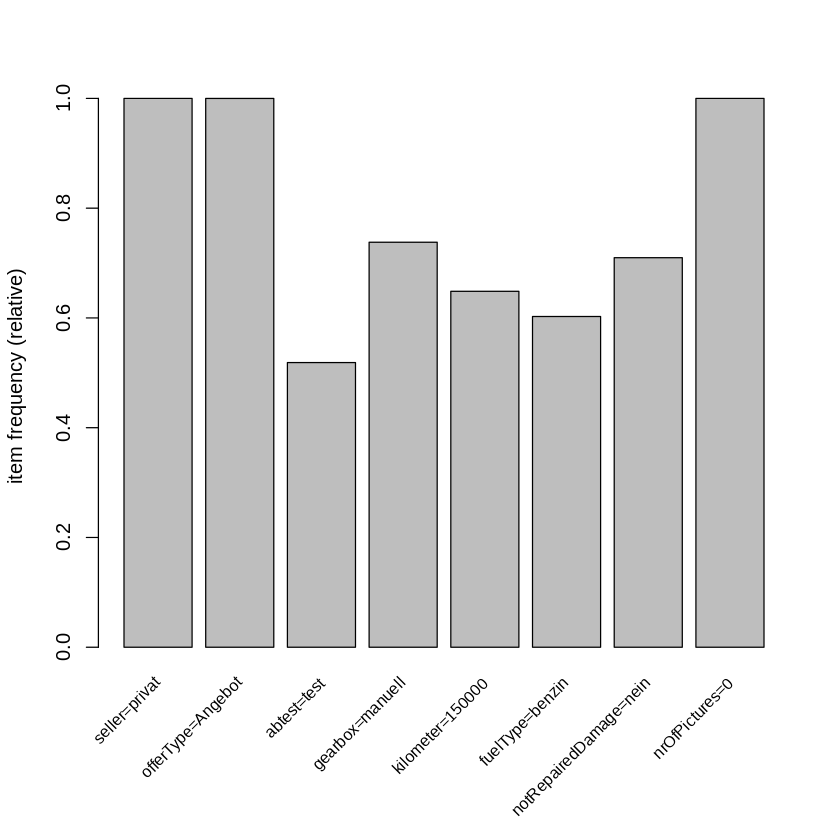

In [13]:
# Your code for activity 8 goes here.
# ------------------------------------
itemFrequencyPlot(auto_trans, support = 0.5, cex.names=0.8)

**Activity 9:** Generate association rules for the transactions in auto_trans with support of 0.3 and confidence of 0.6

In [14]:
# Your code for activity 9 goes here.
# ------------------------------------
rules <- apriori(auto_trans, parameter = list(support = 0.3, confidence = 0.6))


Apriori

Parameter specification:
 confidence minval smax arem  aval originalSupport maxtime support minlen
        0.6    0.1    1 none FALSE            TRUE       5     0.3      1
 maxlen target   ext
     10  rules FALSE

Algorithmic control:
 filter tree heap memopt load sort verbose
    0.1 TRUE TRUE  FALSE TRUE    2    TRUE

Absolute minimum support count: 56804 

set item appearances ...[0 item(s)] done [0.00s].
set transactions ...[141549 item(s), 189349 transaction(s)] done [2.21s].
sorting and recoding items ... [9 item(s)] done [0.08s].
creating transaction tree ... done [0.26s].
checking subsets of size 1 2 3 4 5 6 done [0.00s].
writing ... [480 rule(s)] done [0.00s].
creating S4 object  ... done [0.11s].


**Activity 10:** Draw a scatter plot for the generated rules using 'support' as the measure and 'confidence' for shading.

Loading required package: grid
To reduce overplotting, jitter is added! Use jitter = 0 to prevent jitter.


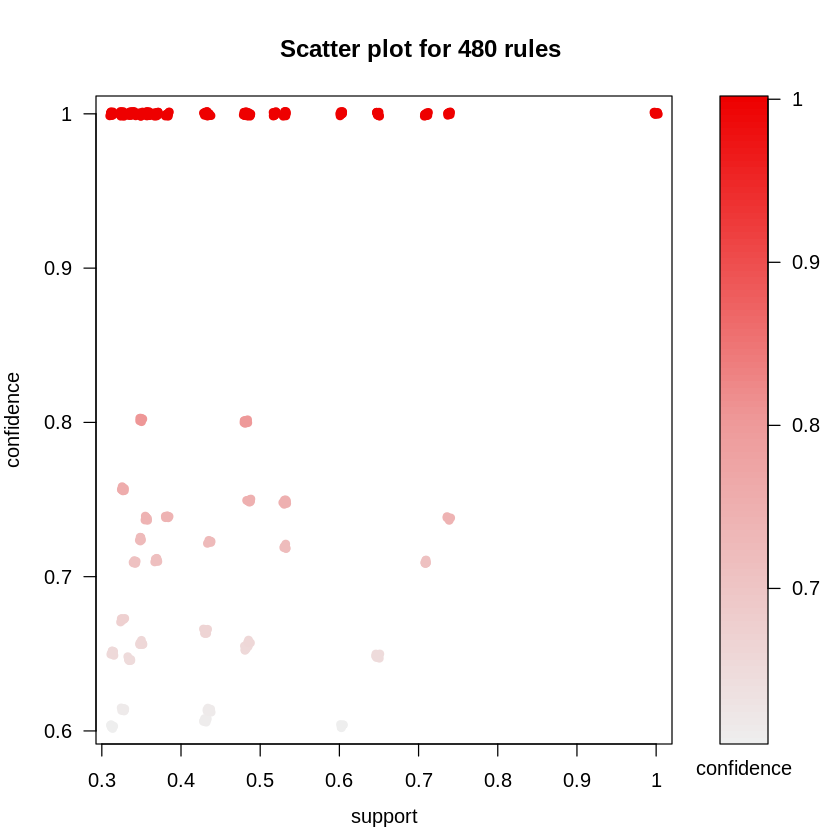

In [15]:
# Your code for activity 10 goes here.
# ------------------------------------
library("arulesViz")
plot(rules, measure=c("support"), shading="confidence")


**Activity 11:** Draw a matrix plot for the generated transactions using the measure 'lift'. Draw the plot, ordering the transactions by the measure "lift".

Itemsets in Antecedent (LHS)
  [1] "{seller=privat,offerType=Angebot,fuelType=benzin,notRepairedDamage=nein,nrOfPictures=0}"   
  [2] "{seller=privat,offerType=Angebot,fuelType=benzin,nrOfPictures=0}"                          
  [3] "{seller=privat,fuelType=benzin,notRepairedDamage=nein,nrOfPictures=0}"                     
  [4] "{offerType=Angebot,fuelType=benzin,notRepairedDamage=nein,nrOfPictures=0}"                 
  [5] "{seller=privat,offerType=Angebot,fuelType=benzin,notRepairedDamage=nein}"                  
  [6] "{seller=privat,offerType=Angebot,gearbox=manuell,nrOfPictures=0}"                          
  [7] "{seller=privat,fuelType=benzin,nrOfPictures=0}"                                            
  [8] "{seller=privat,offerType=Angebot,fuelType=benzin}"                                         
  [9] "{offerType=Angebot,fuelType=benzin,nrOfPictures=0}"                                        
 [10] "{fuelType=benzin,notRepairedDamage=nein,nrOfPictures=0}"                 

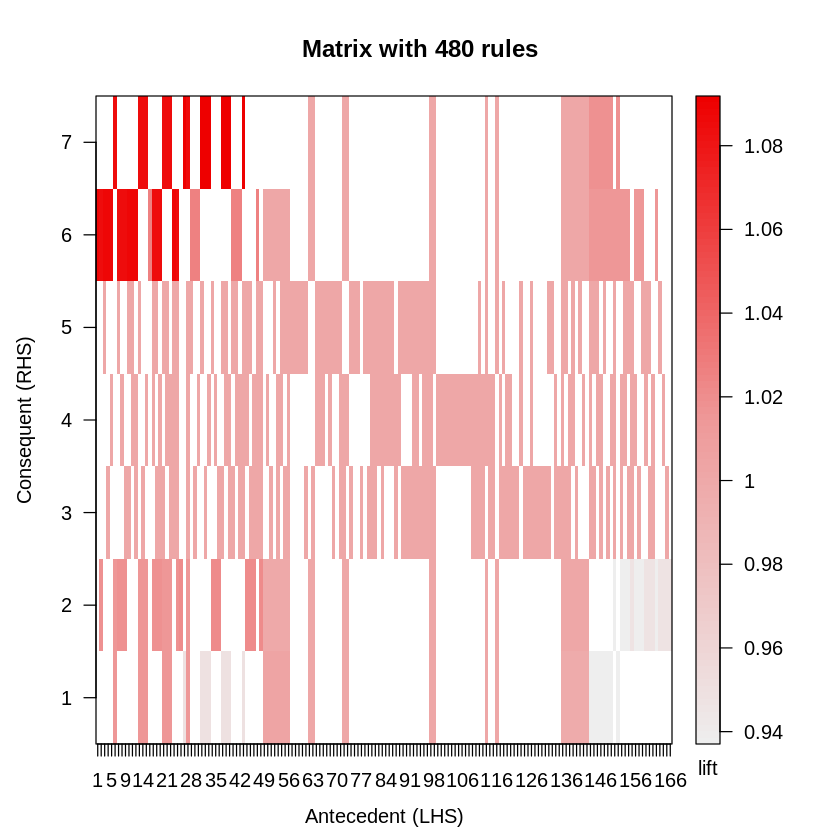

In [16]:
# Your code for activity 11 goes here.
# ------------------------------------
plot(rules,method = "matrix",measure=c("lift"),control=list(reorder='measure'))

**Activity 12:** Draw a grouped matrix plot for the rules.

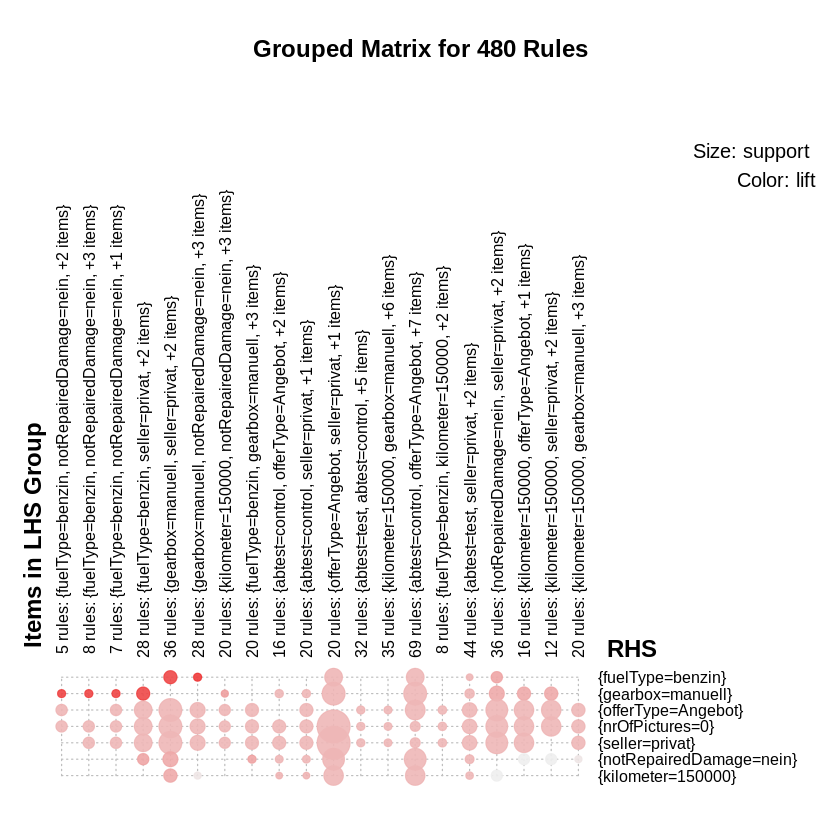

In [17]:
# Your code for activity 12 goes here.
# ------------------------------------
plot(rules,method='grouped')

**Activity 13:** Write the generated rules to a csv file called "auto_sales.csv"

In [18]:
# Your code for activity 13 goes here.
# ------------------------------------
write(rules,file="auto_sales.csv",sep=',',col.names=NA)

# Save your notebook, then `File > Close and Halt`